In [1]:
from kaggle_environments import make, evaluate

# Create the game environment
# Set debug=True to see the errors if your agent refuses to run
env = make("connectx", debug=True)

# List of available default agents
print(list(env.agents))

['random', 'negamax']


In [2]:
# Two random agents play one game round
env.run(["random", "random"])

# Show the game
env.render(mode="ipython")


↓ 返り値は、どの列にコマを落とすかということなので 0 ~ 6 の間になる。

In [3]:
import random
# Selects random valid column
def agent_random(obs, config):
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    return random.choice(valid_moves)

# Selects middle column
def agent_middle(obs, config):
    return config.columns//2

# Selects leftmost valid column
def agent_leftmost(obs, config):
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    return valid_moves[0]

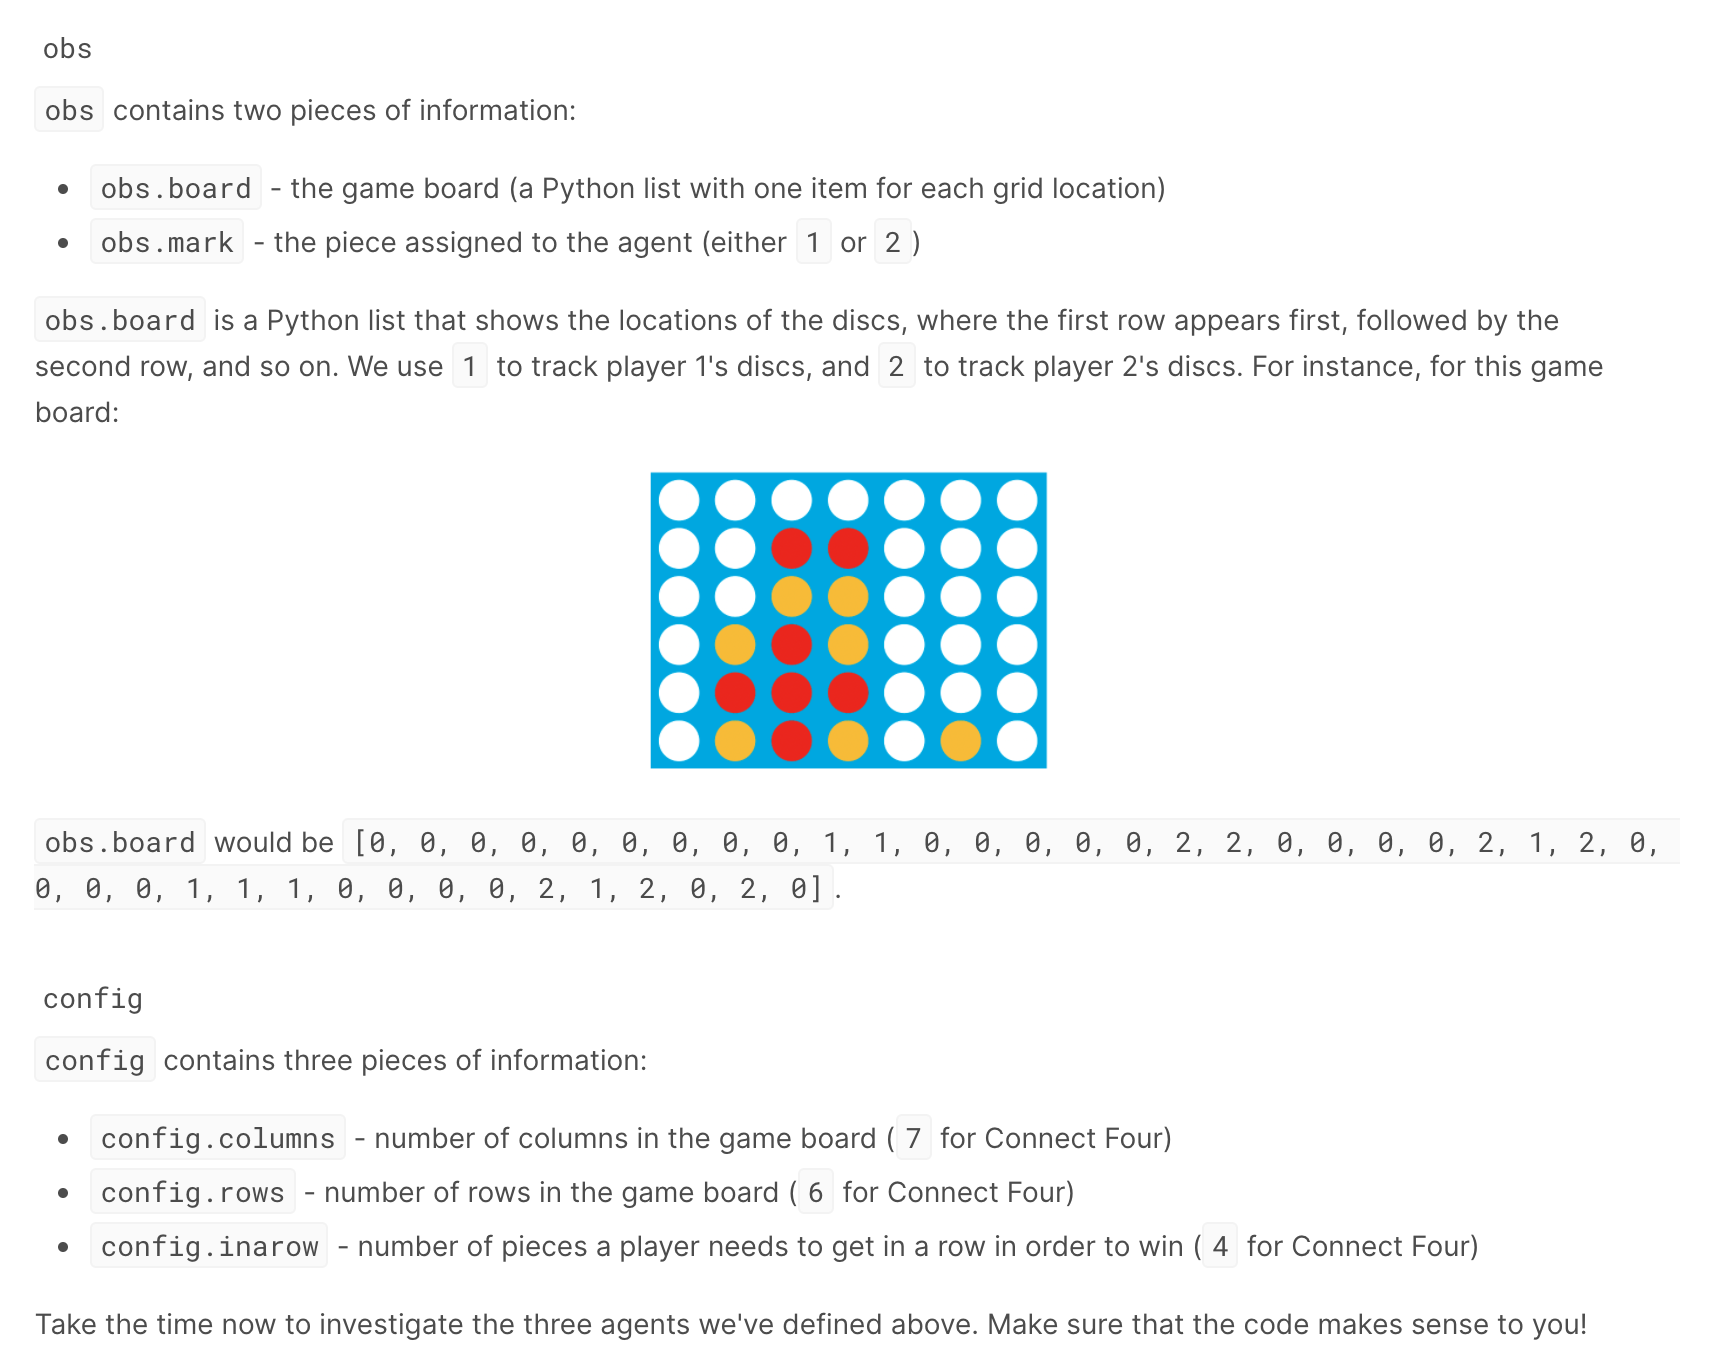

In [4]:
# Agents play one game round
env.run([agent_leftmost, agent_random])

# Show the game
env.render(mode="ipython")

In [5]:
import numpy as np

def get_win_percentages(agent1, agent2, n_rounds=100):
    # Use default Connect Four setup
    config = {'rows': 6, 'columns': 7, 'inarow': 4}
    # Agent 1 goes first (roughly) half the time          
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)
    # Agent 2 goes first (roughly) half the time      
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
    print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
    print("Number of Invalid Plays by Agent 1:", outcomes.count([None, 0]))
    print("Number of Invalid Plays by Agent 2:", outcomes.count([0, None]))

In [6]:
get_win_percentages(agent1=agent_middle, agent2=agent_random)

Agent 1 Win Percentage: 0.78
Agent 2 Win Percentage: 0.01
Number of Invalid Plays by Agent 1: 21
Number of Invalid Plays by Agent 2: 0


In [7]:
get_win_percentages(agent1=agent_leftmost, agent2=agent_random)

Agent 1 Win Percentage: 0.76
Agent 2 Win Percentage: 0.24
Number of Invalid Plays by Agent 1: 0
Number of Invalid Plays by Agent 2: 0
